In [1]:
import pandas as pd
import numpy as np 

import os

import warnings
warnings.filterwarnings("ignore")

from skimage.color import rgb2gray
from skimage.io import imread
from skimage.transform import resize

In [2]:
input_dir=r'C:\Users\90541\Desktop\Yapay Zeka\Udemy Yapay Zeka\Deep Learning DataAI\Projeler\brainTumorCNN\braintumor2d\Brain Tumor Classification 2D\Brain Tumor Classification 2D'

In [3]:
categories=["Astrocytoma","Glioblastoma","Gliomas","Meningioma","Neurocytoma"]

In [4]:
import shutil

def split_train_test(input_dir, categories, train_ratio=0.9, seed=42):
    np.random.seed(seed)
    
    for category in categories:
        category_path = os.path.join(input_dir, category)
        images = os.listdir(category_path)
        
        # Eğitim seti için sınır belirle
        train_count = int(train_ratio * len(images))
        
        # Eğitim ve test setlerini oluştur
        train_images = images[:train_count]
        test_images = images[train_count:]
        
        train_dir = os.path.join(input_dir, 'train', category)
        test_dir = os.path.join(input_dir, 'test', category)
        
        os.makedirs(train_dir, exist_ok=True)
        os.makedirs(test_dir, exist_ok=True)
        
        # Görselleri train dizinine taşı
        for img in train_images:
            shutil.move(os.path.join(category_path, img), os.path.join(train_dir, img))
        
        # Görselleri test dizinine taşı
        for img in test_images:
            shutil.move(os.path.join(category_path, img), os.path.join(test_dir, img))
        
        # Orijinal kategori dizini boşsa, sil
        if not os.listdir(category_path):
            os.rmdir(category_path)

In [5]:
split_train_test(input_dir, categories) 

In [6]:
train_input_dir=r'C:\Users\90541\Desktop\Yapay Zeka\Udemy Yapay Zeka\Deep Learning DataAI\Projeler\brainTumorCNN\braintumor2d\Brain Tumor Classification 2D\Brain Tumor Classification 2D\train'

In [7]:
data = []
labels = []

# Kategoriler ve her kategoriye ait görüntü dosyalarının işlenmesi
for category_idx, category in enumerate(categories):
    # Kategoriye ait her bir dosya için
    for file in os.listdir(os.path.join(train_input_dir, category)):
        # Görüntü dosyasının tam yolu 
        img_path = os.path.join(train_input_dir, category, file)
        
        # Görüntü dosyası okunuyor
        img = imread(img_path)
        
        # Görüntü 3 boyutlu (RGB) veya 4 boyutlu (RGBA) ise gri tonlamaya çevir
        if len(img.shape) == 3 and img.shape[-1] == 4:  # Eğer görüntü RGBA ise
            img = img[..., :3]  # Alfa kanalını atlayarak RGB'ye düşür
            # rgb2gray fonksiyonu sadece 3boyutlu görüntüler için çalıştığı için rgba yı rgb ye dönüştüryoz
            img_gray = rgb2gray(img)
        elif len(img.shape) == 3 and img.shape[-1] == 3:  # Eğer görüntü RGB ise
            img_gray = rgb2gray(img)
        else:
            img_gray = img  # Zaten gri tonlamalıysa devam

        # Görüntü 200x200 boyutlarına yeniden boyutlandırılıyor
        img_resized = resize(img_gray, (200, 200))
        
        # Görüntü düzleştiriliyor (tek boyutlu hale getiriliyor)
        flattened_img = img_resized.flatten()
                
        data.append(flattened_img)
        
        # Kategori indeksini labels listesine ekle
        labels.append(category_idx)

# Liste veri yapılarını numpy dizilerine dönüştür
data = np.asarray(data)
labels = np.asarray(labels)

In [8]:
df=pd.DataFrame(data)
df["labels"]=labels
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,labels
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
6,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,...,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
8,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,...,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0.031373,0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [9]:
df.labels.value_counts()

labels
2    2226
1    1317
3    1152
0     952
4     484
Name: count, dtype: int64

In [10]:
y=df["labels"]
x=df.drop(["labels"],axis=1)

In [11]:
x.shape

(6131, 40000)

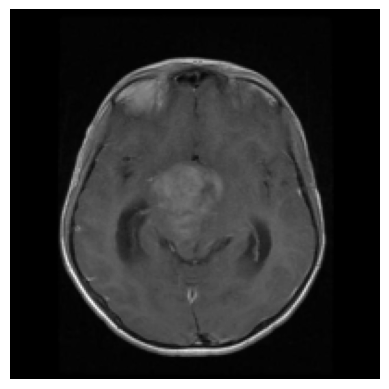

In [12]:
import matplotlib.pyplot as plt

img = x.iloc[2].to_numpy() #numpy diziye dönüştür
img = img.reshape((200,200))
plt.imshow(img,cmap='gray') #siyah-byaz hale getir
plt.axis("off")
plt.show()

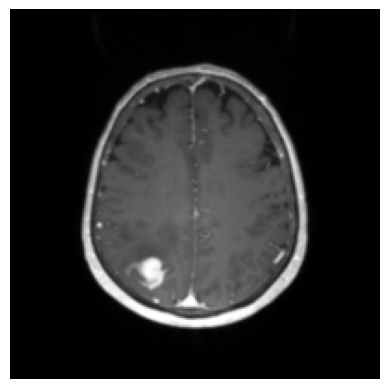

In [13]:
img = x.iloc[200].to_numpy() #numpy diziye dönüştür
img = img.reshape((200,200))
plt.imshow(img,cmap='gray') #siyah-byaz hale getir
plt.axis("off")
plt.show()

##### reshape
* keras 3d anlar o yüzden 28x28x1 şeklinde vermek gerekir veriyi 
    * 1 grey scaled olduğunu belirtir

##### label encoding
* labelları one hot encoding formatına çevirmek gerek. yani vektörlerle temsil edilmeli

In [14]:
#reshape
x=x.values.reshape(-1,200,200,1)
print(x.shape)

(6131, 200, 200, 1)


In [15]:
# Label Encoding 
from keras.utils.np_utils import to_categorical 
y= to_categorical(y, num_classes = 5)

##### train_test_split
* ayrı bir test datası oluşturmuştuj ve en sonunda modelimi o test datasıyla test edicem

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=2)
print("x_train shape",x_train.shape)
print("x_test shape",x_val.shape) 
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (4904, 200, 200, 1)
x_test shape (1227, 200, 200, 1)
y_train shape (4904, 5)
y_test shape (1227, 5)


### CNN

In [17]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential() # içerisinde layerları barındıran yapı

# İlk Convolutional Katman
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (200,200,1)))
#kernel size= filtre sizeım. 16 tane 5x5 lik filtrem var
model.add(MaxPool2D(pool_size=(2,2)))
#2x2lik poolsize kullanıyorum
#model.add(Dropout(0.25))
# %25 nodu devre dışı bırak

# İkinci Convolutional Katman
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#strides=(2,2), poolingde gezdirirken ne kadar atlayacğımı gösterir
#model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(32, activation = "swish"))
model.add(Dense(16, activation = "swish"))
#model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax")) #softmax sigmoidin geliştirilmiş hali. multi classlar için kullanılır

In [18]:
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])
# metrics=["accuracy"], çıkan sonucu accuracyie göre değerlendiricem

### Fit the model

In [19]:
import time

epochs=4
batch_size=32

start_time = time.time()

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val))

end_time = time.time()

time = end_time - start_time

print(f"Training time: {time / 60:.2f} minutes")

Epoch 1/4
154/154 [==============================] - 20s 123ms/step - loss: 0.7907 - accuracy: 0.7243 - val_loss: 0.4169 - val_accuracy: 0.8647
Epoch 2/4
154/154 [==============================] - 21s 139ms/step - loss: 0.3310 - accuracy: 0.8827 - val_loss: 0.3150 - val_accuracy: 0.8949
Epoch 3/4
154/154 [==============================] - 22s 141ms/step - loss: 0.1499 - accuracy: 0.9486 - val_loss: 0.2657 - val_accuracy: 0.9112
Epoch 4/4
154/154 [==============================] - 18s 119ms/step - loss: 0.0858 - accuracy: 0.9719 - val_loss: 0.2892 - val_accuracy: 0.9152
Training time: 1.36 minutes


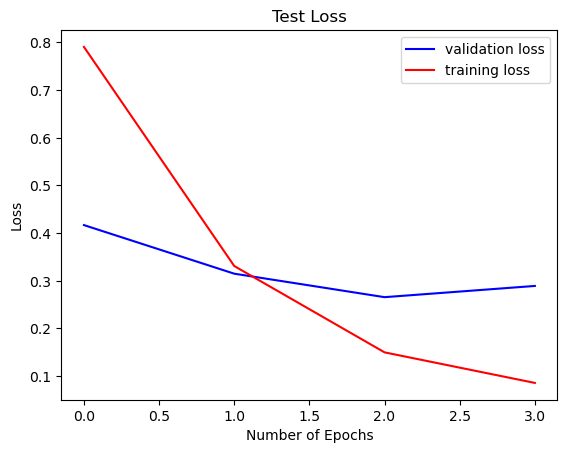

In [24]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.plot(history.history['loss'], color='r', label="training loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

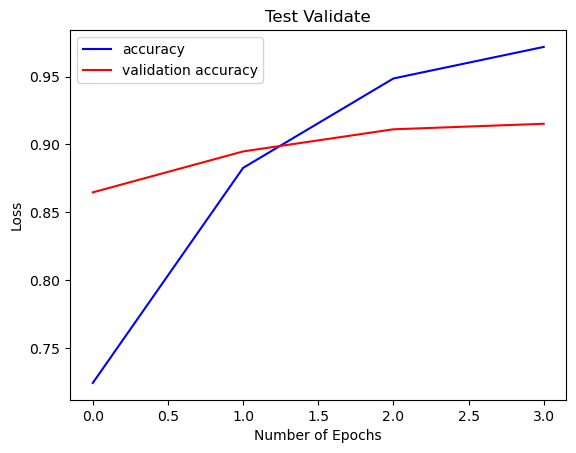

In [25]:
plt.plot(history.history['accuracy'], color='b', label="accuracy")
plt.plot(history.history['val_accuracy'], color='r', label="validation accuracy")
plt.title("Test Validate")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

39/39 [==============================] - 2s 51ms/step


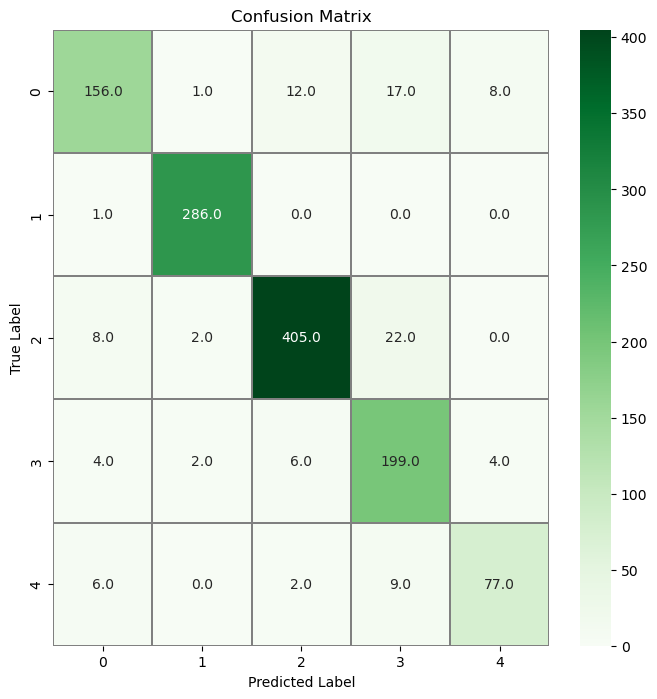

In [26]:
# confusion matrix
import seaborn as sns

y_pred = model.predict(x_val)

y_pred_classes = np.argmax(y_pred,axis = 1) 

y_true = np.argmax(y_val,axis = 1) 

confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

##### classifiaction report

In [27]:
from sklearn.metrics import classification_report
# Tahminleri al
y_pred = model.predict(x_val)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_val.argmax(axis=1)

report = classification_report(y_true, y_pred_classes)
print(report)

39/39 [==============================] - 1s 33ms/step
              precision    recall  f1-score   support

           0       0.89      0.80      0.85       194
           1       0.98      1.00      0.99       287
           2       0.95      0.93      0.94       437
           3       0.81      0.93      0.86       215
           4       0.87      0.82      0.84        94

    accuracy                           0.92      1227
   macro avg       0.90      0.89      0.90      1227
weighted avg       0.92      0.92      0.92      1227

